# Calling various functions (some do, some are just coded into here) in the pre_training_analysis_tools file to display the results here

# Does the following:
## removes metrics with a low variance level (set to 0) -i.e. single value
## finds all highly correlated values, and removes the metric less correlated with maven reuse 
## started to write down some hyper-parameters to test for (when have different reuse rate classes)
## using shap, to explain the importance of each metric (maybe leave if cant explain what happening)
## recursive feature elimination with cross validation - scikit learn
## also selecting metrics in accordance stats - like anova, f-regression (not really sure what to do with this)

### References:
References about feature selection, used some, some haven't - dont understand when to use etc, and also jsut dumping some of the tabs i have opened here
https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b
https://towardsdatascience.com/overview-of-feature-selection-methods-a2d115c7a8f7
https://github.com/jundongl/scikit-feature/blob/master/skfeature/function/similarity_based/lap_score.py

other:
http://rasbt.github.io/mlxtend/


### run the code in sequential order, until the next comment which says to not

In [2]:
# import external modules
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# import local modules.e
from utils import data_loader, pre_training_analysis_tools
from model.base_model import BaseModel



In [3]:
# data - both x and y 
data = data_loader.load_real_dataset()

# getting the x or y component of the data
data_x = data['train_x']
data_y = data['train_y']
#test_x = data['test_x']
#test_y = data['test_y']

# normalising the data
# code sourced from here: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
from sklearn import preprocessing

x = data_x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_x = pd.DataFrame(x_scaled, columns=data_x.columns)

#x = test_x.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#test_x = pd.DataFrame(x_scaled, columns=test_x.columns)



In [4]:
# This gets the list of features (not well formatted) after removing the ones that have a 
# variance below the min threshold (by default threshold is 0, can cahnge in the variancethreshold)

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
print("Original feature shape:", data_x.shape)
new_X = selector.fit_transform(data_x)
print("Transformed feature shape:", new_X.shape)
data_x = data_x.loc[:, selector.get_support()]

print(data_x.columns)



Original feature shape: (151, 265)
Transformed feature shape: (151, 208)
Index(['tcc_sum', 'tcc_average', 'tcc_stdev', 'tcc_median', 'tcc_min',
       'privateMethodsQty_sum', 'privateMethodsQty_average',
       'privateMethodsQty_stdev', 'privateMethodsQty_median',
       'privateMethodsQty_max',
       ...
       'loopQty_sum', 'loopQty_average', 'loopQty_stdev', 'loopQty_median',
       'loopQty_max', 'finalFieldsQty_sum', 'finalFieldsQty_average',
       'finalFieldsQty_stdev', 'finalFieldsQty_median', 'finalFieldsQty_max'],
      dtype='object', length=208)


In [5]:
# since the function below requires both the x and y in a dataframe, this goes through some code to achieve that 
x = data_x
y = data_y
#concat two dataframes for better visualization 
pd.set_option('display.max_rows', None)
matrix = pd.concat([x,y],axis=1)

matrix.dropna(how='any', inplace=True)
display(matrix)

# calling function to remove highly correlated features - by removing the one that is less
# highly correlated with the target/dependent variable
output_data = pre_training_analysis_tools.remove_collinear_features(matrix, 'maven_reuse', 0.90, 'False')

,tcc_sum,tcc_average,tcc_stdev,tcc_median,tcc_min,privateMethodsQty_sum,privateMethodsQty_average,privateMethodsQty_stdev,privateMethodsQty_median,privateMethodsQty_max,...,loopQty_average,loopQty_stdev,loopQty_median,loopQty_max,finalFieldsQty_sum,finalFieldsQty_average,finalFieldsQty_stdev,finalFieldsQty_median,finalFieldsQty_max,maven_reuse
0,0.936272,0.456155,0.975041,1.0,0.0,0.012202,0.052841,0.220908,0.0,0.200000,...,0.014559,0.019224,0.000,0.009539,0.017780,0.110931,0.037857,0.00,0.015,44.0
1,0.002655,0.767075,0.757966,1.0,0.0,0.999213,0.108902,0.241311,0.0,0.457143,...,0.025445,0.045968,0.000,0.154213,0.994363,0.156143,0.057377,0.00,0.099,14.0
2,0.953266,0.847636,0.636324,1.0,0.0,0.110215,0.172662,0.321071,0.0,0.161905,...,0.069382,0.086731,0.000,0.063593,0.128578,0.290217,0.075387,0.00,0.038,135.0
3,0.929899,0.424003,0.981576,1.0,0.0,0.023224,0.083886,0.287173,0.0,0.180952,...,0.057917,0.107095,0.000,0.092210,0.029814,0.155157,0.084473,0.00,0.055,44.0
4,0.990441,0.950428,0.379129,1.0,0.0,0.010825,0.022418,0.077189,0.0,0.066667,...,0.018077,0.022615,0.000,0.015898,0.035668,0.106431,0.027610,0.00,0.008,3003.0
5,0.966012,0.421928,0.983701,1.0,0.0,0.008266,0.060870,0.168190,0.0,0.114286,...,0.039992,0.088175,0.000,0.063593,0.013010,0.138026,0.043168,0.00,0.010,478.0
6,0.992034,0.944959,0.398756,1.0,0.0,0.040150,0.118835,0.392316,0.0,0.352381,...,0.117115,0.155561,0.000,0.100159,0.040004,0.170596,0.110622,0.00,0.069,79.0
7,0.995751,0.456155,1.000000,1.0,0.0,0.004330,0.300000,0.530304,0.0,0.133333,...,0.044797,0.063918,0.000,0.015898,0.000867,0.086580,0.019404,0.00,0.002,47.0
8,1.000000,1.000000,0.000000,1.0,1.0,0.000787,0.029268,0.052962,0.0,0.009524,...,0.091342,0.043647,0.000,0.009539,0.002168,0.116144,0.036377,0.00,0.007,450.0
9,0.369623,0.801043,0.711683,1.0,0.0,0.564456,0.074384,0.194983,0.0,0.476190,...,0.027716,0.048403,0.000,0.136725,0.671075,0.127415,0.050717,0.00,0.080,50.0


privateMethodsQty_sum | tcc_sum | 0.94
privateMethodsQty_sum: -0.047
tcc_sum: 0.074
dropped: privateMethodsQty_sum
-----------------------------------------------------------------------------
parenthesizedExpsQty_sum | publicFieldsQty_sum | 0.92
parenthesizedExpsQty_sum: -0.058
publicFieldsQty_sum: -0.058
dropped: parenthesizedExpsQty_sum
-----------------------------------------------------------------------------
stringLiteralsQty_sum | tcc_sum | 0.94
stringLiteralsQty_sum: -0.067
tcc_sum: 0.074
dropped: stringLiteralsQty_sum
-----------------------------------------------------------------------------
stringLiteralsQty_sum | privateMethodsQty_sum | 0.94
stringLiteralsQty_sum: -0.067
privateMethodsQty_sum: -0.047
dropped: stringLiteralsQty_sum
-----------------------------------------------------------------------------
stringLiteralsQty_stdev | stringLiteralsQty_average | 0.92
stringLiteralsQty_stdev: -0.081
stringLiteralsQty_average: -0.086
dropped: stringLiteralsQty_average
-----

lcc_median | tcc_median | 1.0
lcc_median: 0.04
tcc_median: 0.04
dropped: tcc_median
-----------------------------------------------------------------------------
lcc_min | tcc_min | 1.0
lcc_min: -0.028
tcc_min: -0.028
dropped: tcc_min
-----------------------------------------------------------------------------
staticFieldsQty_sum | privateMethodsQty_sum | 0.96
staticFieldsQty_sum: -0.064
privateMethodsQty_sum: -0.047
dropped: staticFieldsQty_sum
-----------------------------------------------------------------------------
staticFieldsQty_sum | publicFieldsQty_sum | 0.95
staticFieldsQty_sum: -0.064
publicFieldsQty_sum: -0.058
dropped: staticFieldsQty_sum
-----------------------------------------------------------------------------
staticFieldsQty_sum | stringLiteralsQty_sum | 0.96
staticFieldsQty_sum: -0.064
stringLiteralsQty_sum: -0.067
dropped: stringLiteralsQty_sum
-----------------------------------------------------------------------------
staticFieldsQty_sum | assignmentsQty_sum 

cbo_sum | tcc_sum | 0.94
cbo_sum: -0.047
tcc_sum: 0.074
dropped: cbo_sum
-----------------------------------------------------------------------------
cbo_sum | privateMethodsQty_sum | 0.97
cbo_sum: -0.047
privateMethodsQty_sum: -0.047
dropped: cbo_sum
-----------------------------------------------------------------------------
cbo_sum | publicFieldsQty_sum | 0.92
cbo_sum: -0.047
publicFieldsQty_sum: -0.058
dropped: publicFieldsQty_sum
-----------------------------------------------------------------------------
cbo_sum | stringLiteralsQty_sum | 0.98
cbo_sum: -0.047
stringLiteralsQty_sum: -0.067
dropped: stringLiteralsQty_sum
-----------------------------------------------------------------------------
cbo_sum | assignmentsQty_sum | 0.98
cbo_sum: -0.047
assignmentsQty_sum: -0.066
dropped: assignmentsQty_sum
-----------------------------------------------------------------------------
cbo_sum | uniqueWordsQty_sum | 0.99
cbo_sum: -0.047
uniqueWordsQty_sum: -0.059
dropped: uniqueWordsQty

loc_sum | assignmentsQty_sum | 0.99
loc_sum: -0.068
assignmentsQty_sum: -0.066
dropped: loc_sum
-----------------------------------------------------------------------------
loc_sum | uniqueWordsQty_sum | 0.97
loc_sum: -0.068
uniqueWordsQty_sum: -0.059
dropped: loc_sum
-----------------------------------------------------------------------------
loc_sum | privateFieldsQty_sum | 0.92
loc_sum: -0.068
privateFieldsQty_sum: -0.124
dropped: privateFieldsQty_sum
-----------------------------------------------------------------------------
loc_sum | totalMethodsQty_sum | 0.99
loc_sum: -0.068
totalMethodsQty_sum: -0.059
dropped: loc_sum
-----------------------------------------------------------------------------
loc_sum | dit_sum | 0.98
loc_sum: -0.068
dit_sum: -0.063
dropped: loc_sum
-----------------------------------------------------------------------------
loc_sum | staticFieldsQty_sum | 0.98
loc_sum: -0.068
staticFieldsQty_sum: -0.064
dropped: loc_sum
-----------------------------------

variablesQty_median | loc_median | 0.91
variablesQty_median: -0.076
loc_median: -0.067
dropped: variablesQty_median
-----------------------------------------------------------------------------
tryCatchQty_sum | publicFieldsQty_sum | 0.92
tryCatchQty_sum: 0.003
publicFieldsQty_sum: -0.058
dropped: publicFieldsQty_sum
-----------------------------------------------------------------------------
tryCatchQty_sum | stringLiteralsQty_sum | 0.91
tryCatchQty_sum: 0.003
stringLiteralsQty_sum: -0.067
dropped: stringLiteralsQty_sum
-----------------------------------------------------------------------------
tryCatchQty_sum | assignmentsQty_sum | 0.95
tryCatchQty_sum: 0.003
assignmentsQty_sum: -0.066
dropped: assignmentsQty_sum
-----------------------------------------------------------------------------
tryCatchQty_sum | uniqueWordsQty_sum | 0.93
tryCatchQty_sum: 0.003
uniqueWordsQty_sum: -0.059
dropped: uniqueWordsQty_sum
------------------------------------------------------------------------

abstractMethodsQty_sum | privateMethodsQty_sum | 0.95
abstractMethodsQty_sum: -0.06
privateMethodsQty_sum: -0.047
dropped: abstractMethodsQty_sum
-----------------------------------------------------------------------------
abstractMethodsQty_sum | publicFieldsQty_sum | 0.95
abstractMethodsQty_sum: -0.06
publicFieldsQty_sum: -0.058
dropped: abstractMethodsQty_sum
-----------------------------------------------------------------------------
abstractMethodsQty_sum | stringLiteralsQty_sum | 0.97
abstractMethodsQty_sum: -0.06
stringLiteralsQty_sum: -0.067
dropped: stringLiteralsQty_sum
-----------------------------------------------------------------------------
abstractMethodsQty_sum | assignmentsQty_sum | 1.0
abstractMethodsQty_sum: -0.06
assignmentsQty_sum: -0.066
dropped: assignmentsQty_sum
-----------------------------------------------------------------------------
abstractMethodsQty_sum | uniqueWordsQty_sum | 0.99
abstractMethodsQty_sum: -0.06
uniqueWordsQty_sum: -0.059
dropped: abs

protectedMethodsQty_sum: -0.096
cbo_sum: -0.047
dropped: protectedMethodsQty_sum
-----------------------------------------------------------------------------
protectedMethodsQty_sum | rfc_sum | 0.94
protectedMethodsQty_sum: -0.096
rfc_sum: -0.046
dropped: protectedMethodsQty_sum
-----------------------------------------------------------------------------
protectedMethodsQty_sum | innerClassesQty_sum | 0.95
protectedMethodsQty_sum: -0.096
innerClassesQty_sum: -0.068
dropped: protectedMethodsQty_sum
-----------------------------------------------------------------------------
protectedMethodsQty_sum | loc_sum | 0.93
protectedMethodsQty_sum: -0.096
loc_sum: -0.068
dropped: protectedMethodsQty_sum
-----------------------------------------------------------------------------
protectedMethodsQty_sum | nosi_sum | 0.96
protectedMethodsQty_sum: -0.096
nosi_sum: -0.058
dropped: protectedMethodsQty_sum
-----------------------------------------------------------------------------
protectedMethod

comparisonsQty_sum | parenthesizedExpsQty_sum | 0.91
comparisonsQty_sum: -0.015
parenthesizedExpsQty_sum: -0.058
dropped: parenthesizedExpsQty_sum
-----------------------------------------------------------------------------
comparisonsQty_sum | returnQty_sum | 0.9
comparisonsQty_sum: -0.015
returnQty_sum: -0.045
dropped: returnQty_sum
-----------------------------------------------------------------------------
comparisonsQty_sum | mathOperationsQty_sum | 0.97
comparisonsQty_sum: -0.015
mathOperationsQty_sum: -0.028
dropped: mathOperationsQty_sum
-----------------------------------------------------------------------------
comparisonsQty_sum | cbo_max | 0.95
comparisonsQty_sum: -0.015
cbo_max: 0.028
dropped: comparisonsQty_sum
-----------------------------------------------------------------------------
modifiers_sum | tcc_sum | 0.95
modifiers_sum: -0.089
tcc_sum: 0.074
dropped: modifiers_sum
-----------------------------------------------------------------------------
modifiers_sum |

finalFieldsQty_sum | tcc_sum | 0.94
finalFieldsQty_sum: -0.049
tcc_sum: 0.074
dropped: finalFieldsQty_sum
-----------------------------------------------------------------------------
finalFieldsQty_sum | privateMethodsQty_sum | 0.98
finalFieldsQty_sum: -0.049
privateMethodsQty_sum: -0.047
dropped: finalFieldsQty_sum
-----------------------------------------------------------------------------
finalFieldsQty_sum | publicFieldsQty_sum | 0.92
finalFieldsQty_sum: -0.049
publicFieldsQty_sum: -0.058
dropped: publicFieldsQty_sum
-----------------------------------------------------------------------------
finalFieldsQty_sum | stringLiteralsQty_sum | 0.97
finalFieldsQty_sum: -0.049
stringLiteralsQty_sum: -0.067
dropped: stringLiteralsQty_sum
-----------------------------------------------------------------------------
finalFieldsQty_sum | assignmentsQty_sum | 0.97
finalFieldsQty_sum: -0.049
assignmentsQty_sum: -0.066
dropped: assignmentsQty_sum
------------------------------------------------

In [6]:
# storing the output data into a var
data_x_y = output_data

# Displays the all the current data left after above steps have been done
display(data_x_y)

# separate into train and test datasets.
data_x = data_x_y.sample(frac=0.5,random_state=0)
test_x = data_x_y.drop(data_x.index)   # remove all training observations.

# split x and y values.
data_y = data_x.pop('maven_reuse')
test_y = test_x.pop('maven_reuse')

# getting the x or y component of the data
#data_x = output_data
#data_y = output_data.pop('maven_reuse')

display(data_x)
display(test_x)
display(data_y)
display(test_y)


,privateMethodsQty_average,privateMethodsQty_stdev,privateMethodsQty_median,privateMethodsQty_max,publicFieldsQty_average,publicFieldsQty_median,parenthesizedExpsQty_average,parenthesizedExpsQty_stdev,parenthesizedExpsQty_median,parenthesizedExpsQty_max,...,defaultFieldsQty_average,defaultFieldsQty_max,loopQty_average,loopQty_stdev,loopQty_median,loopQty_max,finalFieldsQty_average,finalFieldsQty_stdev,finalFieldsQty_median,maven_reuse
0,0.052841,0.220908,0.0,0.200000,0.043905,0.0,0.029454,0.057624,0.00,0.053738,...,0.168485,0.120690,0.014559,0.019224,0.000,0.009539,0.110931,0.037857,0.00,44.0
1,0.108902,0.241311,0.0,0.457143,0.063505,0.0,0.038847,0.064946,0.00,0.158879,...,0.022206,0.241379,0.025445,0.045968,0.000,0.154213,0.156143,0.057377,0.00,14.0
2,0.172662,0.321071,0.0,0.161905,0.101841,0.0,0.094160,0.176645,0.00,0.331776,...,0.019077,0.094828,0.069382,0.086731,0.000,0.063593,0.290217,0.075387,0.00,135.0
3,0.083886,0.287173,0.0,0.180952,0.122253,0.0,0.162392,0.640273,0.00,1.000000,...,0.015019,0.034483,0.057917,0.107095,0.000,0.092210,0.155157,0.084473,0.00,44.0
4,0.022418,0.077189,0.0,0.066667,0.020689,0.0,0.008092,0.038847,0.00,0.081776,...,0.003691,0.025862,0.018077,0.022615,0.000,0.015898,0.106431,0.027610,0.00,3003.0
5,0.060870,0.168190,0.0,0.114286,0.075758,0.0,0.017406,0.028649,0.00,0.018692,...,0.174965,0.112069,0.039992,0.088175,0.000,0.063593,0.138026,0.043168,0.00,478.0
6,0.118835,0.392316,0.0,0.352381,0.174757,0.0,0.184752,0.302871,0.00,0.336449,...,0.096698,0.250000,0.117115,0.155561,0.000,0.100159,0.170596,0.110622,0.00,79.0
7,0.300000,0.530304,0.0,0.133333,0.082645,0.0,0.013369,0.019350,0.00,0.007009,...,0.000000,0.000000,0.044797,0.063918,0.000,0.015898,0.086580,0.019404,0.00,47.0
8,0.029268,0.052962,0.0,0.009524,0.105322,0.0,0.121951,0.078301,0.00,0.025701,...,0.121462,0.034483,0.091342,0.043647,0.000,0.009539,0.116144,0.036377,0.00,450.0
9,0.074384,0.194983,0.0,0.476190,0.063484,0.0,0.034600,0.066148,0.00,0.235981,...,0.025910,0.232759,0.027716,0.048403,0.000,0.136725,0.127415,0.050717,0.00,50.0


,privateMethodsQty_average,privateMethodsQty_stdev,privateMethodsQty_median,privateMethodsQty_max,publicFieldsQty_average,publicFieldsQty_median,parenthesizedExpsQty_average,parenthesizedExpsQty_stdev,parenthesizedExpsQty_median,parenthesizedExpsQty_max,...,modifiers_max,defaultFieldsQty_average,defaultFieldsQty_max,loopQty_average,loopQty_stdev,loopQty_median,loopQty_max,finalFieldsQty_average,finalFieldsQty_stdev,finalFieldsQty_median
8,0.029268,0.052962,0.0,0.009524,0.105322,0.0,0.121951,0.078301,0.00,0.025701,...,0.500000,0.121462,0.034483,0.091342,0.043647,0.000,0.009539,0.116144,0.036377,0.00
65,0.090865,0.454867,0.0,0.333333,0.015297,0.0,0.007777,0.020206,0.00,0.018692,...,0.500000,0.002177,0.008621,0.025586,0.077688,0.000,0.058824,0.014881,0.007915,0.00
106,0.044444,0.120636,0.0,0.038095,0.185185,0.0,0.001362,0.003963,0.00,0.002336,...,0.503418,0.041919,0.008621,0.001825,0.004080,0.000,0.001590,0.202822,0.070816,0.00
121,0.240000,0.147505,0.4,0.019048,0.181818,0.0,0.838235,0.710181,0.00,0.128505,...,0.007324,0.000000,0.000000,0.078842,0.039089,0.000,0.004769,0.333333,0.035823,1.00
111,0.108943,0.241870,0.0,0.457143,0.063670,0.0,0.039133,0.065257,0.00,0.158879,...,0.505371,0.022201,0.241379,0.025531,0.046067,0.000,0.154213,0.156994,0.057666,0.00
32,0.094737,0.149681,0.0,0.047619,0.201854,0.0,0.019350,0.026544,0.00,0.016355,...,0.500000,0.002978,0.008621,0.018154,0.022206,0.000,0.009539,0.452694,0.140475,0.00
48,0.057551,0.116400,0.0,0.076190,0.038033,0.0,0.014006,0.053128,0.00,0.105140,...,0.503906,0.031413,0.215517,0.010727,0.021834,0.000,0.017488,0.117914,0.031255,0.00
35,0.045868,0.064519,0.0,0.019048,0.002817,0.0,0.007444,0.012432,0.00,0.009346,...,0.500000,0.000000,0.000000,0.000611,0.002355,0.000,0.001590,0.120523,0.026254,0.00
70,0.197389,0.324257,0.0,0.171429,0.221339,0.0,0.262632,0.661906,0.00,0.841121,...,0.504395,0.018913,0.034483,0.120425,0.120275,0.000,0.085851,0.466866,0.120052,0.50
28,0.208368,0.300341,0.0,0.142857,0.052301,0.0,0.050455,0.068303,0.00,0.049065,...,0.500000,0.005683,0.008621,0.074636,0.054341,0.000,0.020668,0.409444,0.086749,0.00


,privateMethodsQty_average,privateMethodsQty_stdev,privateMethodsQty_median,privateMethodsQty_max,publicFieldsQty_average,publicFieldsQty_median,parenthesizedExpsQty_average,parenthesizedExpsQty_stdev,parenthesizedExpsQty_median,parenthesizedExpsQty_max,...,modifiers_max,defaultFieldsQty_average,defaultFieldsQty_max,loopQty_average,loopQty_stdev,loopQty_median,loopQty_max,finalFieldsQty_average,finalFieldsQty_stdev,finalFieldsQty_median
0,0.052841,0.220908,0.0,0.200000,0.043905,0.0,0.029454,0.057624,0.0,0.053738,...,0.503906,0.168485,0.120690,0.014559,0.019224,0.000,0.009539,0.110931,0.037857,0.00
4,0.022418,0.077189,0.0,0.066667,0.020689,0.0,0.008092,0.038847,0.0,0.081776,...,0.503906,0.003691,0.025862,0.018077,0.022615,0.000,0.015898,0.106431,0.027610,0.00
5,0.060870,0.168190,0.0,0.114286,0.075758,0.0,0.017406,0.028649,0.0,0.018692,...,0.504395,0.174965,0.112069,0.039992,0.088175,0.000,0.063593,0.138026,0.043168,0.00
9,0.074384,0.194983,0.0,0.476190,0.063484,0.0,0.034600,0.066148,0.0,0.235981,...,0.505371,0.025910,0.232759,0.027716,0.048403,0.000,0.136725,0.127415,0.050717,0.00
12,0.149020,0.287043,0.0,0.180952,0.099525,0.0,0.033881,0.043989,0.0,0.030374,...,0.504395,0.016274,0.051724,0.092756,0.092905,0.000,0.049285,0.125272,0.045516,0.00
14,0.100395,0.356536,0.0,0.552381,0.131865,0.0,0.058782,0.200884,0.0,0.616822,...,0.505371,0.058118,0.215517,0.057203,0.115636,0.000,0.295707,0.136368,0.104809,0.00
18,0.126978,0.267283,0.0,0.219048,0.043795,0.0,0.002884,0.009632,0.0,0.021028,...,0.504395,0.001224,0.017241,0.019124,0.027979,0.000,0.022258,0.156315,0.066033,0.00
20,0.228343,0.460643,0.0,0.342857,0.332977,0.0,0.025912,0.056328,0.0,0.088785,...,0.504395,0.006854,0.060345,0.034149,0.047253,0.000,0.033386,0.401298,0.179754,0.00
21,0.281102,0.456697,0.0,0.142857,0.066213,0.0,0.223483,0.351534,0.0,0.221963,...,0.500000,0.024953,0.034483,0.564932,0.595490,0.000,0.238474,0.179978,0.039045,0.00
22,0.116044,0.296850,0.0,0.409524,0.151992,0.0,0.040090,0.073114,0.0,0.142523,...,0.504395,0.009882,0.068966,0.063115,0.068569,0.000,0.077901,0.240024,0.405043,0.00


8       450.0
65       54.0
106      38.0
121      36.0
111      42.0
32      155.0
48       43.0
35      398.0
70       58.0
28        0.0
86      368.0
7        47.0
23       99.0
122     847.0
10       40.0
52      440.0
145      49.0
104      20.0
2       135.0
107      11.0
56      127.0
110      35.0
25       37.0
55       42.0
54       39.0
44        3.0
141      32.0
79     1133.0
77       22.0
17       78.0
69      409.0
140     208.0
13       13.0
89        0.0
91      288.0
49      113.0
15      412.0
105      57.0
134     166.0
109     427.0
3        44.0
47      600.0
6        79.0
98       50.0
58      135.0
113      50.0
108      20.0
131     398.0
68       45.0
126      21.0
84       13.0
29      530.0
19       64.0
125    1128.0
11       23.0
144     618.0
128      61.0
45      574.0
100      26.0
66       58.0
1        14.0
61       16.0
112      68.0
130      20.0
46      492.0
Name: maven_reuse, dtype: float64

0        44.0
4      3003.0
5       478.0
9        50.0
12       62.0
14       18.0
18       45.0
20      426.0
21     1249.0
22       61.0
24      406.0
26       29.0
30      396.0
31      726.0
33      203.0
34     4110.0
37      525.0
38      612.0
39       39.0
40      304.0
41       29.0
42      401.0
50       50.0
51      229.0
53       36.0
57       20.0
59       11.0
62       74.0
63      279.0
74      125.0
76       35.0
78       37.0
80       44.0
83       69.0
85      439.0
87       13.0
88       12.0
90      104.0
92      429.0
93       49.0
94     1694.0
96      237.0
97       42.0
99      555.0
101    1572.0
102      39.0
103     273.0
114      56.0
115      24.0
117     495.0
118     178.0
124       0.0
127      85.0
129      23.0
132     428.0
133      28.0
136     643.0
137      60.0
138     369.0
142      34.0
143      60.0
146     448.0
147      52.0
148     314.0
150      28.0
Name: maven_reuse, dtype: float64

### Code below should not be run in any order, not dependent on each other. Are all just indepdent feature important visulations 

The best parameters are {'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'} with a score of 0.01
<bound method NDFrame.head of        metric  n_neighbors   weights  Accuracy
2   euclidean           21   uniform  0.007576
10  minkowski           21   uniform  0.007576
0   euclidean            1   uniform  0.000000
1   euclidean            1  distance  0.000000
3   euclidean           21  distance  0.000000
4   manhattan            1   uniform  0.000000
5   manhattan            1  distance  0.000000
6   manhattan           21   uniform  0.000000
7   manhattan           21  distance  0.000000
8   minkowski            1   uniform  0.000000
9   minkowski            1  distance  0.000000
11  minkowski           21  distance  0.000000>


Text(0, 0.5, 'Error Rate')

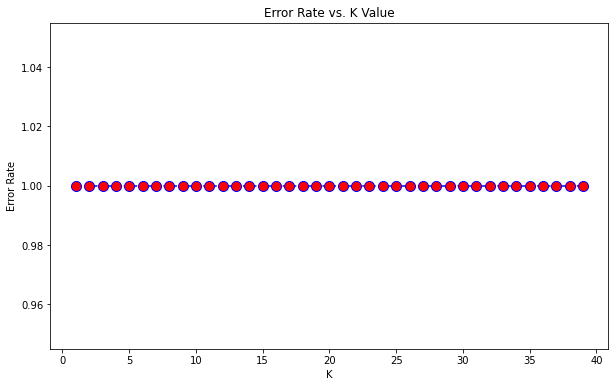

In [26]:
# hyper-parameter tuning knn
# tunning n_neighbors, metrics, weights 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

import matplotlib as mpl
import matplotlib.pyplot as plt

model = KNeighborsClassifier()

cv = RepeatedKFold(n_splits=2, n_repeats=2, random_state=1)
# use this one for classifiation - esp, when there is an inbalance in the classes (i.e. a lot are high reuse rate, 
# but barely any are low)
# requirement - that the number of different samples in each class (i.e. high reusability) is greater then n_splits
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

param_space = {
            'n_neighbors': (1, 21),  # integer valued parameter
            'weights': ['uniform', 'distance'],  # categorical parameter
            'metric': ['euclidean', 'manhattan', 'minkowski'] # categorical parameter
        }

# look at


# Set all the variables for the grid search cross validation 
search = GridSearchCV(estimator=model, param_grid=param_space, cv=cv, n_jobs=-1, scoring='accuracy')

# perform the search - i.e. it fits the model on the training data set for the different hyper-parameter settings
search_result = search.fit(data_x, data_y)

# Prints the results - optimal hyper-parameters and the accuracy score
print("The best parameters are %s with a score of %0.2f"
    % (search_result.best_params_, search_result.best_score_))

# Displays all of the hyper-parameters combination in descending order of accuracy score
grid_results = pd.concat([pd.DataFrame(search_result.cv_results_["params"]),pd.DataFrame(search_result.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.sort_values(by=['Accuracy'], inplace=True, ascending=False)
print(grid_results.head)

# sourced: https://datascienceplus.com/k-nearest-neighbors-knn-with-python/
# just testing the n_neigbors
# Running KNN for various values of n_neighbors and storing results
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_x,data_y)
    pred_i = knn.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# want to choose k with the least error rate
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
# tree classifer hyper-parameter tunning
# suggestions for decision tree: https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680





In [ ]:
# svm hyper-parameter tuning
# if kernel is only linear
# optimise c parameter
param_grid = {'C': [0.1, 1, 10, 100],  
              'kernel': ['linear']}  


#if kernel is radial
# both gamma and c need to be optimised
# note: If gamma is large, the effect of c becomes negligible. If gamma is small, c affects the model just like how it affects a linear model.

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

# if kernel is polynomial
# note: If the polynomial kernel works out, then it is a good idea to dive into the degree hyperparameter.


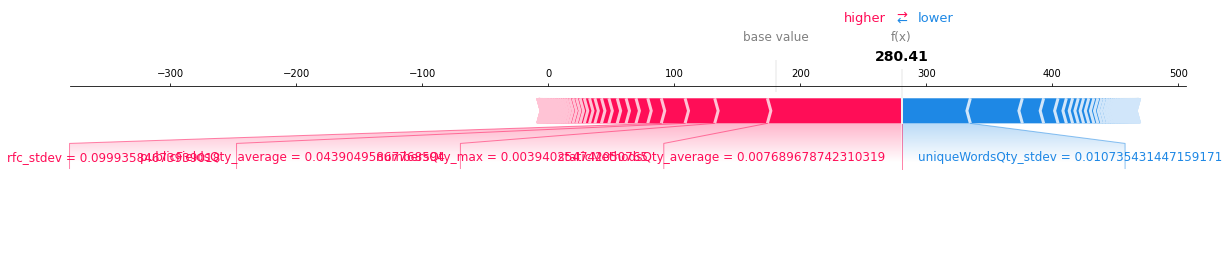

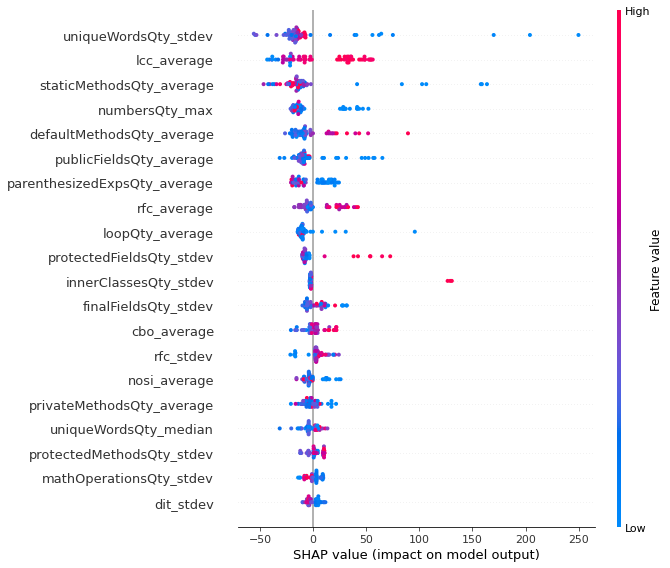

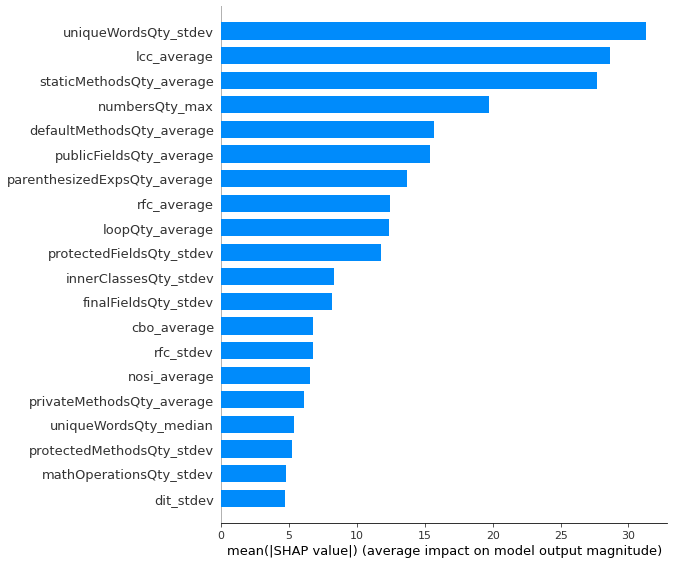

In [28]:
# reference: code is from this github: https://github.com/slundberg/shap
# github code has more visulations ways, explanations and papers the autor wrote and is related too
# idk really understand what is happening either, but it seems cool haha 
# reference: explanation of using this code is from article: https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

# Note: according to article above, this algo is specifically good for tree based classifers 
# Comment: the modifers_median was also identified as the most important feature by far when using
# the seleck k best using f-regression property (from scikit learn). idk if that says anything
# Correction on comment: maybe not, just tried and isn't

import xgboost
import shap

# This part - Tree ensemble example with TreeExplainer
# Comment: the shap code set also has agnostic model method - i.e that can use any model 
# other then just tree based 

# load JS visualization code to notebook
shap.initjs()
# train XGBoost model
model = xgboost.train({
    "learning_rate": 0.1,
 "max_depth": 5,
 "min_child_weight": 1,
 "gamma": 0,
 "subsample": 0.8,
 "colsample_bytree": 0.8,
 "nthread": 4,
 "scale_pos_weight": 1,
 "seed": 27
}, xgboost.DMatrix(data_x, label=data_y), 100)


# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values_test = explainer.shap_values(test_x)
shap_values_train = explainer.shap_values(data_x)

# This shows the impacts of the various features has on pushing the average target value - maven reuse out from the
# average 
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values_test[0,:], test_x.iloc[0,:], matplotlib=True)

# visualize the training set predictions - idk how to get this one to work
shap.force_plot(explainer.expected_value, shap_values_test, test_x)

# summarize the effects of all the features
shap.summary_plot(shap_values_test, test_x)

# Takes the mean absolute value of the SHAP values for each feature to get a 
# standard bar plot (produces stacked bars for multi-class outputs)
shap.summary_plot(shap_values_test, test_x, plot_type="bar")


In [18]:
# reference: code is from this github: https://github.com/slundberg/shap
# github code has more visulations ways, explanations and papers the autor wrote and is related too
# idk really understand what is happening either, but it seems cool haha 
# reference: explanation of using this code is from article: https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

# Note: according to article above, this algo is specifically good for tree based classifers 
# Comment: the modifers_median was also identified as the most important feature by far when using
# the seleck k best using f-regression property (from scikit learn). idk if that says anything
# Correction on comment: maybe not, just tried and isn't

import sklearn.ensemble
import shap
from sklearn.metrics import accuracy_score

# using random forest 
# load JS visualization code to notebook
shap.initjs()

# train random forest model
model = sklearn.ensemble.RandomForestRegressor()
model.fit(data_x, data_y)
#y_pred = model.predict(test_x)
#accuracy_score(test_y, y_pred)

# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values_test = explainer.shap_values(test_x)
shap_values_train = explainer.shap_values(data_x)

# This shows the impacts of the various features has on pushing the average target value - maven reuse out from the
# average 
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values_test[0,:], test_x.iloc[0,:], matplotlib=True)

# visualize the training set predictions - idk how to get this one to work
shap.force_plot(explainer.expected_value, shap_values_test, test_x)

# summarize the effects of all the features
shap.summary_plot(shap_values_test, test_x)

# Takes the mean absolute value of the SHAP values for each feature to get a 
# standard bar plot (produces stacked bars for multi-class outputs)
shap.summary_plot(shap_values_test, test_x, plot_type="bar")

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

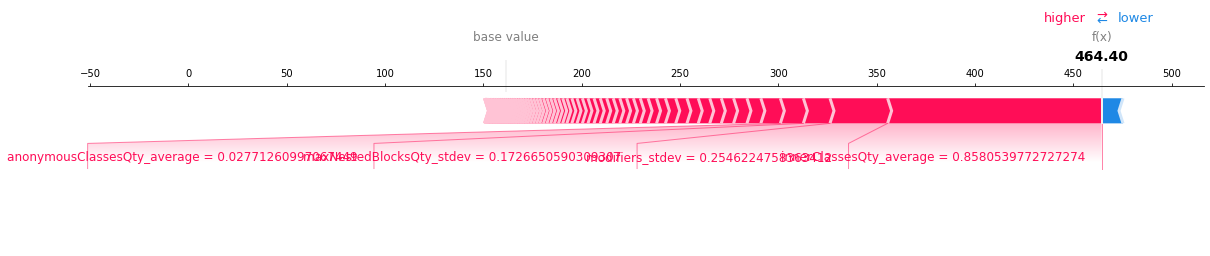

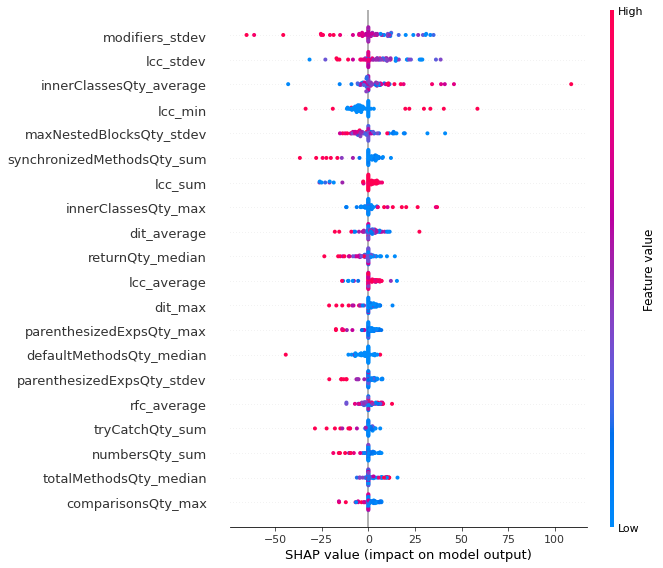

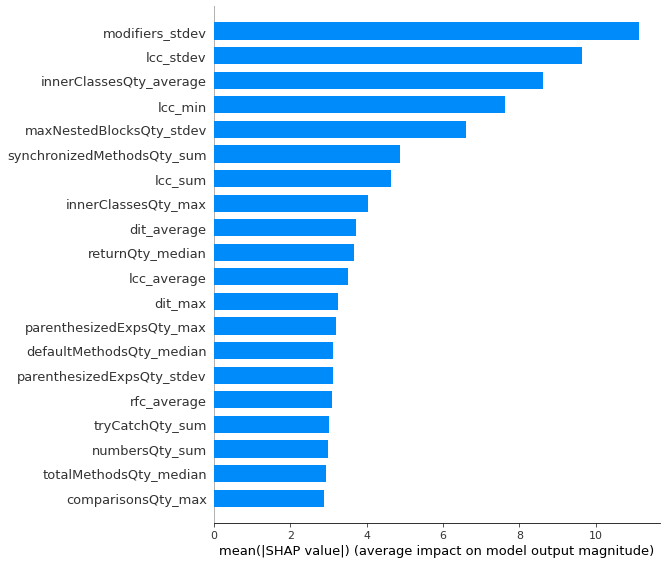

In [8]:
# reference: code is from this github: https://github.com/slundberg/shap
# github code has more visulations ways, explanations and papers the autor wrote and is related too
# idk really understand what is happening either, but it seems cool haha 
# reference: explanation of using this code is from article: https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

# Note: according to article above, this algo is specifically good for tree based classifers 
# Comment: the modifers_median was also identified as the most important feature by far when using
# the seleck k best using f-regression property (from scikit learn). idk if that says anything
# Correction on comment: maybe not, just tried and isn't

import sklearn.ensemble
import sklearn

# using random forest 
# load JS visualization code to notebook
shap.initjs()

# train random forest model
model = sklearn.neighbors.KNeighborsRegressor()
model.fit(data_x, data_y)

"""
Must use Kernel method on KNN.
Rather than use the whole training set to estimate expected values, we summarize with
 a set of weighted kmeans, each weighted by the number of points they represent.
 Running without the kmeans took 1 hr 6 mins 7 sec. 
 Running with the kmeans took 2 min 47 sec.
Boston Housing is a very small dataset.
Running SHAP on models that require Kernel method and have a good amount of data becomes prohibitive. 
"""
X_train_summary = shap.kmeans(data_x, 10)
# using kmeans to explain the model's predictions
explainer = shap.KernelExplainer(model.predict, X_train_summary)
shap_values_test = explainer.shap_values(test_x)
shap_values_train = explainer.shap_values(data_x)

# This shows the impacts of the various features has on pushing the average target value - maven reuse out from the
# average 
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values_test[0,:], test_x.iloc[0,:], matplotlib=True)

# visualize the training set predictions - idk how to get this one to work
shap.force_plot(explainer.expected_value, shap_values_test, test_x)

# summarize the effects of all the features
shap.summary_plot(shap_values_test, test_x)

# Takes the mean absolute value of the SHAP values for each feature to get a 
# standard bar plot (produces stacked bars for multi-class outputs)
shap.summary_plot(shap_values_test, test_x, plot_type="bar")

In [14]:

# reference: code is from this github: https://github.com/slundberg/shap
# github code has more visulations ways, explanations and papers the autor wrote and is related too
# idk really understand what is happening either, but it seems cool haha 
# reference: explanation of using this code is from article: https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

# Note: according to article above, this algo is specifically good for tree based classifers 
# Comment: the modifers_median was also identified as the most important feature by far when using
# the seleck k best using f-regression property (from scikit learn). idk if that says anything
# Correction on comment: maybe not, just tried and isn't

import xgboost
import shap

# This part - Tree ensemble example with TreeExplainer
# Comment: the shap code set also has agnostic model method - i.e that can use any model 
# other then just tree based 

import time

def print_accuracy(f):
    print("Accuracy = {0}%".format(100*np.sum(f(test_x) == test_y)/len(test_y)))
    time.sleep(0.5) # to let the print get out before any progress bars

# load JS visualization code to notebook
shap.initjs()
# train XGBoost model
model = sklearn.svm.SVC(kernel='rbf', probability=True)
model.fit(data_x, data_y)
print_accuracy(model.predict)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.KernelExplainer(model.predict_proba, data_x)
shap_values_test = explainer.shap_values(test_x)
shap_values_train = explainer.shap_values(data_x)

# This shows the impacts of the various features has on pushing the average target value - maven reuse out from the
# average 
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values_test[0,:], test_x.iloc[0,:], matplotlib=True)

# visualize the training set predictions - idk how to get this one to work
shap.force_plot(explainer.expected_value, shap_values_test, test_x)

# summarize the effects of all the features
shap.summary_plot(shap_values_test, test_x)

# Takes the mean absolute value of the SHAP values for each feature to get a 
# standard bar plot (produces stacked bars for multi-class outputs)
shap.summary_plot(shap_values_test, test_x, plot_type="bar")

shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

Accuracy = 1.5384615384615385%


KeyboardInterrupt: 

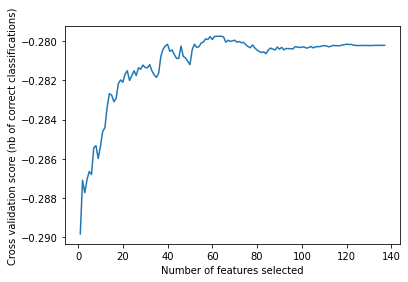

Optimal number of features : 63
                         Feature  Ranking  Selected     Score
3          privateMethodsQty_max        1      True -0.287060
4        publicFieldsQty_average        1      True -0.286644
6   parenthesizedExpsQty_average        1      True -0.285441
7     parenthesizedExpsQty_stdev        1      True -0.285328
12         stringLiteralsQty_max        1      True -0.283358
19      privateFieldsQty_average        1      True -0.282092
20       privateFieldsQty_median        1      True -0.281673
22    synchronizedMethodsQty_sum        1      True -0.281998
27          totalFieldsQty_stdev        1      True -0.281425
29            totalFieldsQty_max        1      True -0.281342
30     defaultMethodsQty_average        1      True -0.281356
33        totalMethodsQty_median        1      True -0.281713
34                   dit_average        1      True -0.281843
35                     dit_stdev        1      True -0.281639
37                       dit_max      

In [27]:
pre_training_analysis_tools.recursive_feature_elimination(data_x, data_y)


In [52]:
# currently set to use the scikit learn select k best - using f-regression,
# Comment: there are other statistics - anonva, mutal information in the python pre training analysis tools
pre_training_analysis_tools.univariate_selection(data_x, data_y)

                       Feature     Score
53                 dit_average  0.160718
15                 tcc_average  0.149651
22     privateMethodsQty_stdev  0.144725
9      protectedMethodsQty_max  0.143595
16                   tcc_stdev  0.123702
20        uniqueWordsQty_stdev  0.085106
21          uniqueWordsQty_max  0.074105
70        visibleFieldsQty_max  0.074102
31                  lcc_median  0.062241
18      staticFieldsQty_median  0.059348
13       defaultMethodsQty_max  0.058131
32                     lcc_max  0.038333
60                 nosi_median  0.027829
40                  cbo_median  0.027023
79   protectedFieldsQty_median  0.026667
10       defaultMethodsQty_sum  0.023343
35  synchronizedMethodsQty_max  0.017255
71            returnQty_median  0.016739
77                  rfc_median  0.005854
0       publicFieldsQty_median  0.000000


In [9]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(data_x, data_y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(data_x)
X_new.shape


Liblinear failed to converge, increase the number of iterations.


(52, 28)

In [ ]:
# reference: https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html
# supposdely works - but takes very long and gets stuck 
# cool tool using pandas profiling - is able to generate a report that includes
# scatter plots, correlation matrixes, identifying highly correlated features, features
# with only unique values, features with zero's etc

import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(data_x_y, title="Pandas Profiling Report")

profile.to_widgets()



